In [22]:
import numpy as np # linear algebra
import pandas as pd # 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
import warnings
warnings.filterwarnings("ignore")

from eli5.sklearn import PermutationImportance

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [2]:
normalized = pd.read_csv('normalized.csv', delimiter=',')
#This file contains the information of the DB without the comments of the causes 
normalized.head()

,Project,FY,Quarter,Month,Main Category,Category_details,Main_Causes,Causes_details,Amount,MonthN,CauseN
0,ALNG,2010,Q3,August,Operations,Installations,PLANNING,1.2 Late delivery from suppliers/subcontractors,1.453043,8,1
1,ALNG,2010,Q3,June,Operations,Installations,PLANNING,1.4 Ship Rescheduling/Reallocation : Change of...,7.752658,6,2
2,ALNG,2010,Q2,May,Operations,Installations,PLANNING,1.4 Ship Rescheduling/Reallocation : Change of...,7.594819,5,2
3,Block 15,2010,Q1,February,Project Management,Project Management,PLANNING,1.1 Late issue of AFC documentation,0.703771,2,3
4,Block 15,2010,Q1,December,Fabrication,Fabrication,PLANNING,1.1 Late issue of AFC documentation,0.117295,12,3


In [3]:
normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 11 columns):
Project             432 non-null object
FY                  432 non-null int64
Quarter             432 non-null object
Month               432 non-null object
Main Category       432 non-null object
Category_details    432 non-null object
Main_Causes         432 non-null object
Causes_details      432 non-null object
Amount              432 non-null float64
MonthN              432 non-null int64
CauseN              432 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 37.2+ KB


First model: Only numerical columns

In [4]:
# Select numeric columns only
numeric_cols = [cname for cname in normalized.columns if normalized[cname].dtype in ['int64', 'float64']]
X = normalized[numeric_cols].copy()

In [6]:
y = normalized.Amount
X.drop(['Amount'], axis=1, inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])


In [13]:
#Write a scoring function
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 1.5059711963847888


In [14]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
        Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    # Replace this body with your own code
    return scores.mean()

In [17]:
results = {}
for i in range (50,750,50):
    results[i] = get_score(i) 

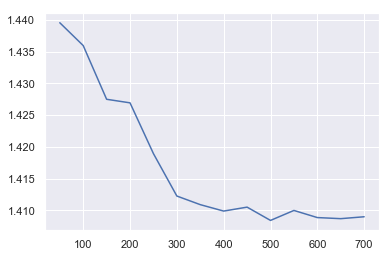

In [18]:
plt.plot(results.keys(), results.values())
plt.show()

In [20]:
n_estimators_best = min(results, key=results.get)
print(n_estimators_best)

500


best model: RandomForestRegressor(n_estimators=50, random_state=0)